#   <center><font color='blue'>Diabetes Prediction Using Adaptive Boosting</font></center>

## Raw data

### It refers to pima Indians Diabetes Dataset. It was released by National Institute of Diabetes and Kidney 

### Loading the Dataset

In [1]:
import pandas as pd
raw_data= pd.read_csv("pima-indians-diabetes.csv")
raw_data.columns=["Pregnancies","Glucose","Blood_Pressure","Skin_Thickness","Insulin","BMI","Diabetes_Pedigree","Age","Outcome"]

In [2]:
raw_data

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
raw_data.loc[769]=[6,148,72,35,0,33.6,0.627,50,1]

In [4]:
raw_data

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
763,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
764,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
765,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
766,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


    plt.figure(figsize = (12, 8))
    plt.title('Blood_Pressure attribute in pima dataset')
    cnts,edges,bars=plt.hist(raw_data['Blood_Pressure'],edgecolor='black')
    plt.bar_label(bars)
    plt.xlabel('Blood_Pressure')
    plt.ylabel('frequency')
    plt.show()

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 769
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    float64
 1   Glucose            768 non-null    float64
 2   Blood_Pressure     768 non-null    float64
 3   Skin_Thickness     768 non-null    float64
 4   Insulin            768 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    float64
 8   Outcome            768 non-null    float64
dtypes: float64(9)
memory usage: 60.0 KB


## Preprocessing

In [6]:
import numpy as np
raw_data=raw_data.replace(" ",np.nan)
for i in raw_data.columns:
    print("\t%s : %d" %(i,raw_data[i].isna().sum()))

	Pregnancies : 0
	Glucose : 0
	Blood_Pressure : 0
	Skin_Thickness : 0
	Insulin : 0
	BMI : 0
	Diabetes_Pedigree : 0
	Age : 0
	Outcome : 0


In [7]:
col=raw_data.columns[1:8]
for i in col:
    raw_data[i]=raw_data[i].replace(0,np.nan)
    print("\t %s :%d" %(i,raw_data[i].isna().sum()))
    raw_data[i]=raw_data[i].fillna(raw_data[i].mean())
    

	 Glucose :5
	 Blood_Pressure :35
	 Skin_Thickness :227
	 Insulin :374
	 BMI :11
	 Diabetes_Pedigree :0
	 Age :0


In [8]:
raw_data


,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree,Age,Outcome
0,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,29.15342,155.548223,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
763,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
764,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
765,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0
766,1.0,93.0,70.0,31.00000,155.548223,30.4,0.315,23.0,0.0


In [9]:
dups=raw_data.duplicated()
print("Number of duplicated instances in raw_data: %d" %(dups.sum()))


Number of duplicated instances in raw_data: 0


In [10]:
rawdata=raw_data.drop(columns=['Outcome'])
rawdata.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

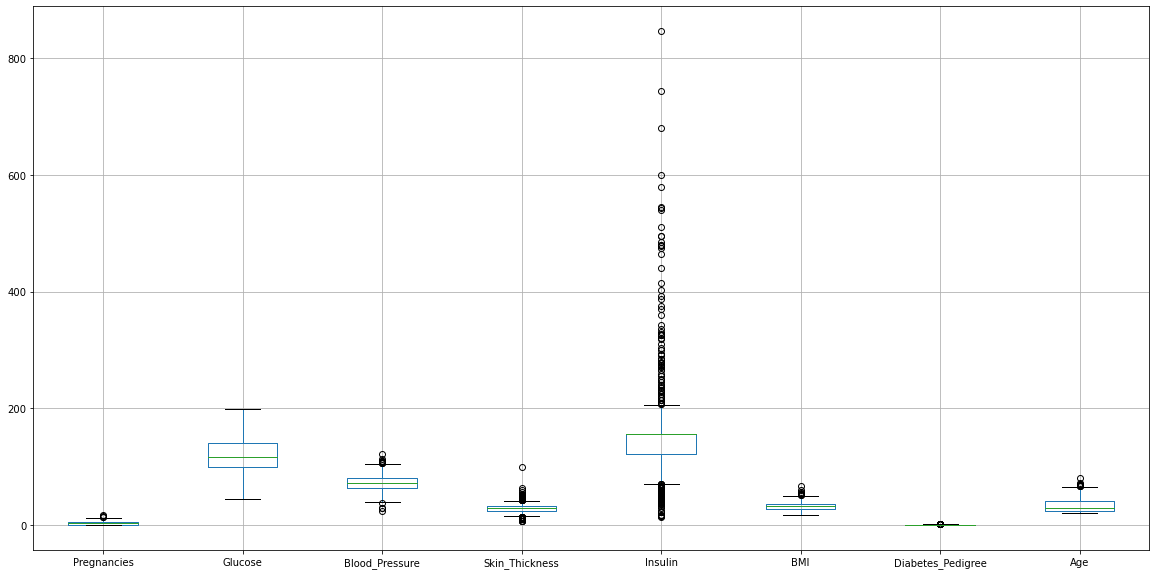

In [11]:
rawdata.boxplot(figsize=(20,10))


<AxesSubplot:>

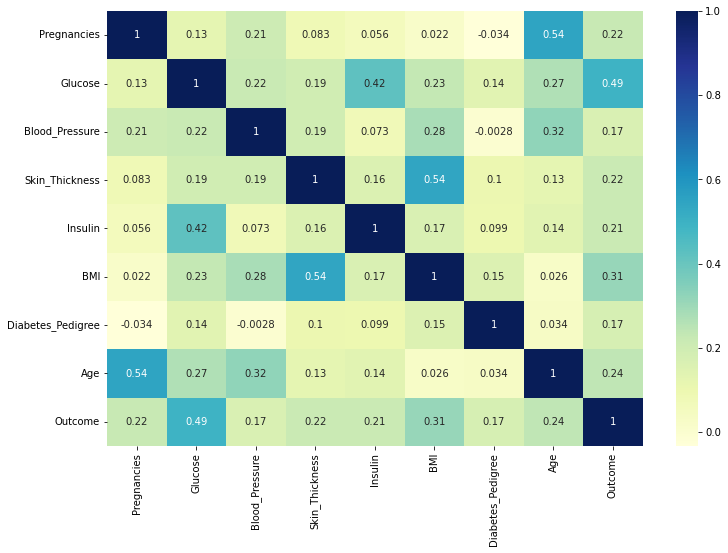

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(data=raw_data.corr(), cmap="YlGnBu", annot=True)

In [13]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    IQR=q3-q1
    lb=q1-1.5*IQR
    ub=q3+1.5*IQR
    ls=df.index[(df[ft]<lb)|(df[ft]>ub)]
    return ls

In [14]:
indexlist=[]
k=list(rawdata.columns)
print(k)
k.remove('Insulin')
print(k)
for i in k:
    indexlist.extend(outliers(raw_data,i))

['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree', 'Age']
['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'BMI', 'Diabetes_Pedigree', 'Age']


In [15]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [16]:
df_clean=remove(raw_data,indexlist)

In [17]:
df_clean.shape

(627, 9)

<AxesSubplot:>

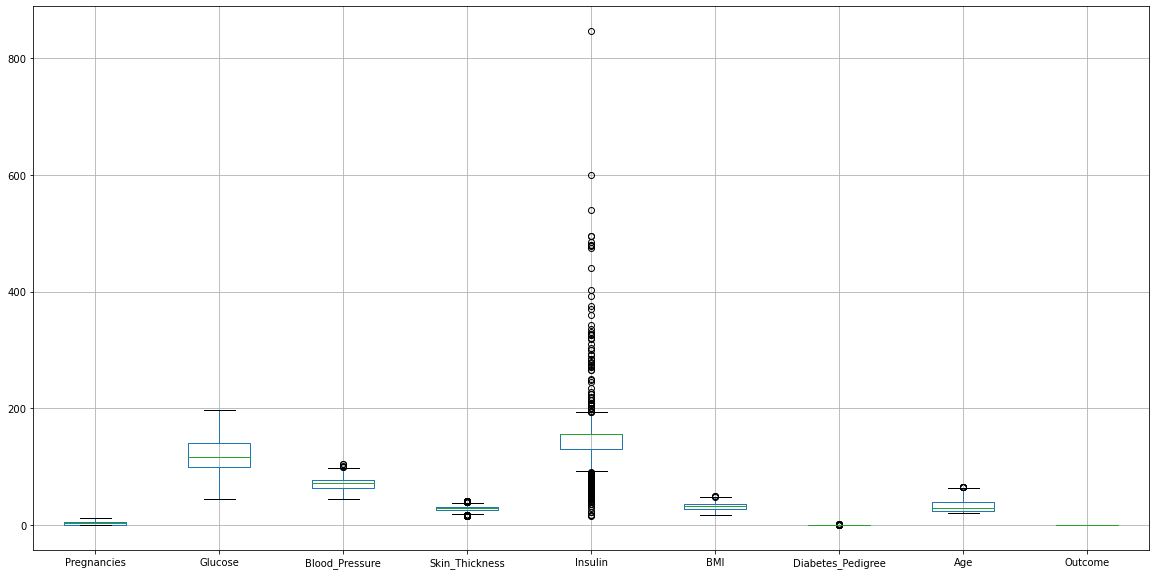

In [18]:
df_clean.boxplot(figsize=(20,10))

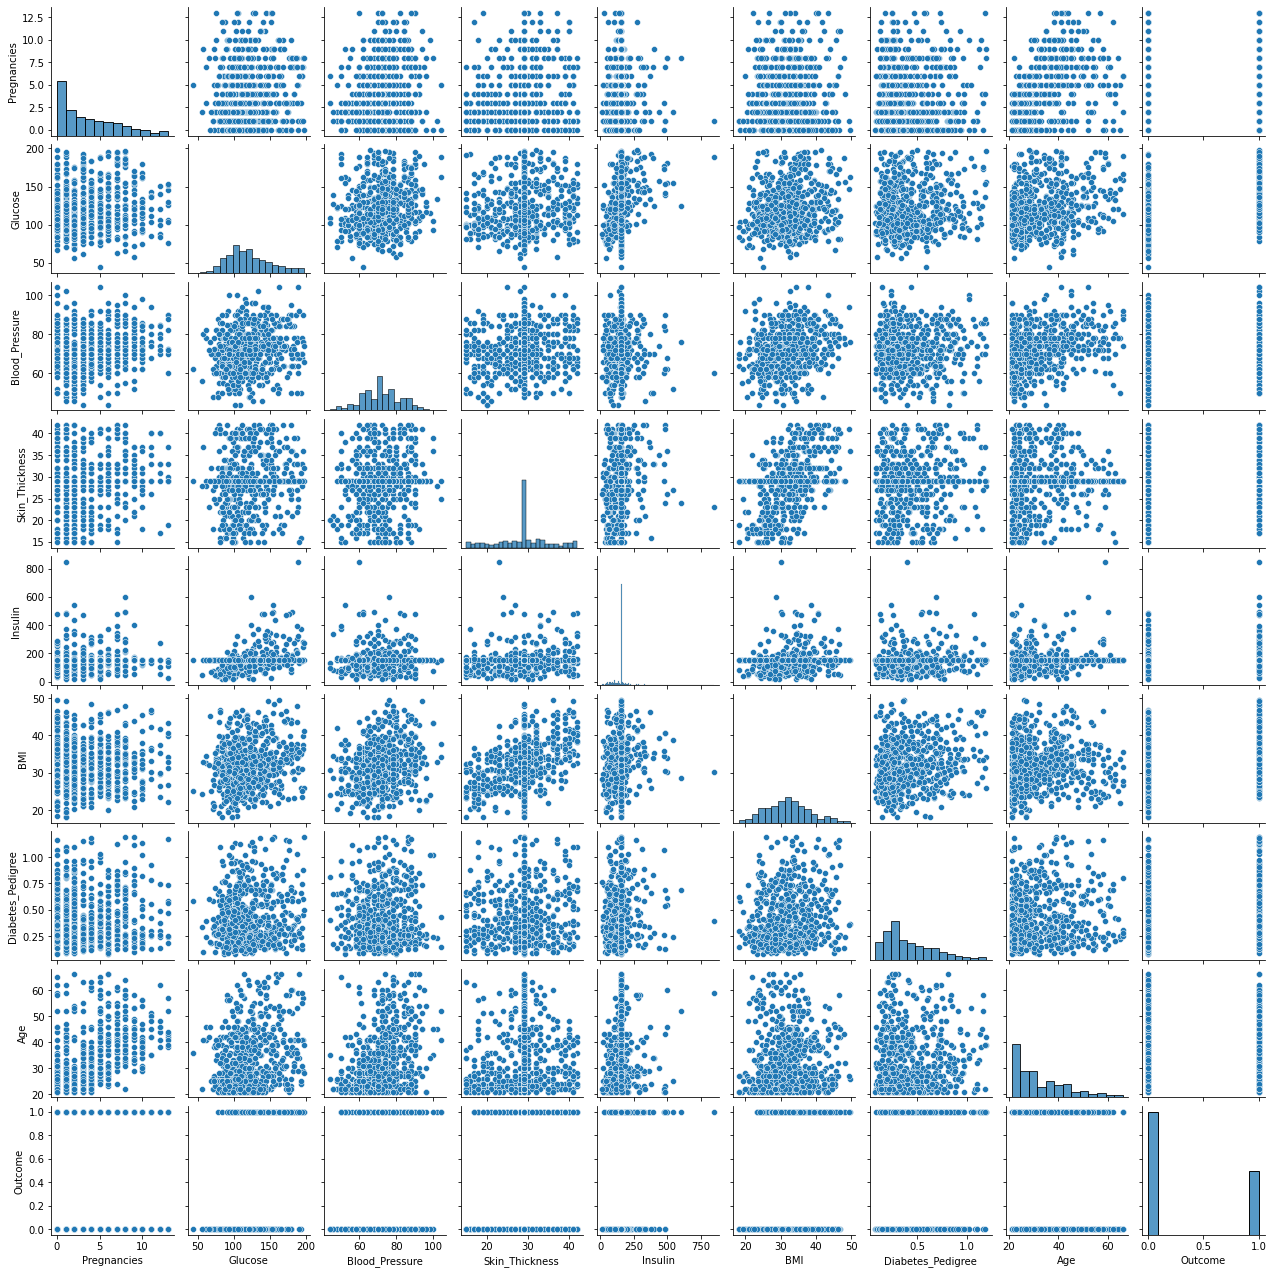

In [19]:
import seaborn as sns
zb=sns.pairplot(df_clean,height=2)
plt.savefig("pairplot.png")
plt.show()


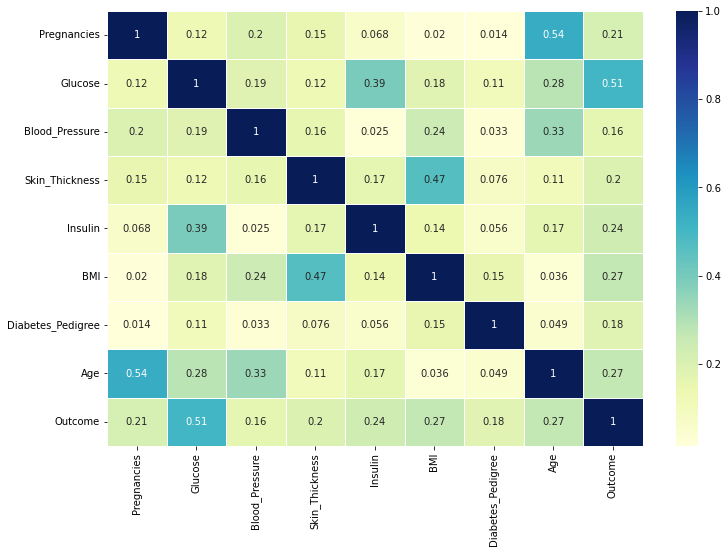

In [20]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(data=df_clean.corr(), cmap="YlGnBu",linewidth=0.5,annot=True)
plt.savefig('heatmap.png')

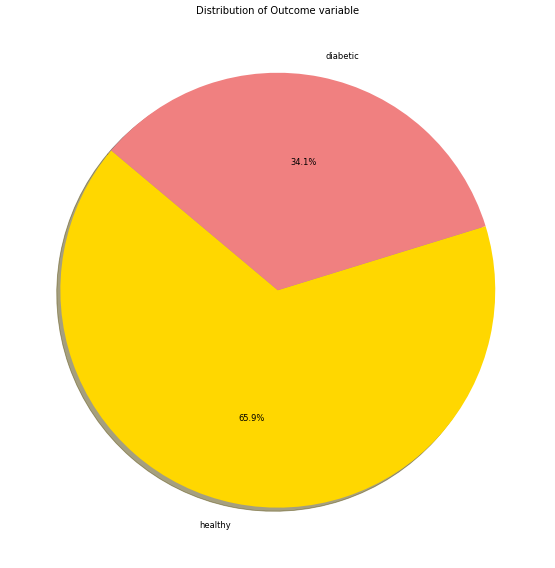

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12), dpi= 60)
plt.title('Distribution of Outcome variable')
plt.pie(df_clean['Outcome'].value_counts(), labels = ['healthy','diabetic'], colors = ['gold', 'lightcoral'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig("pichart.png")  
plt.show()

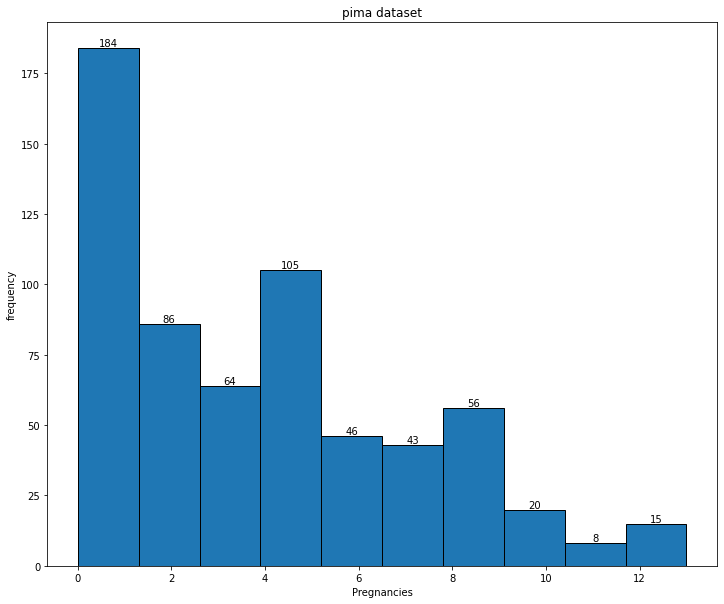

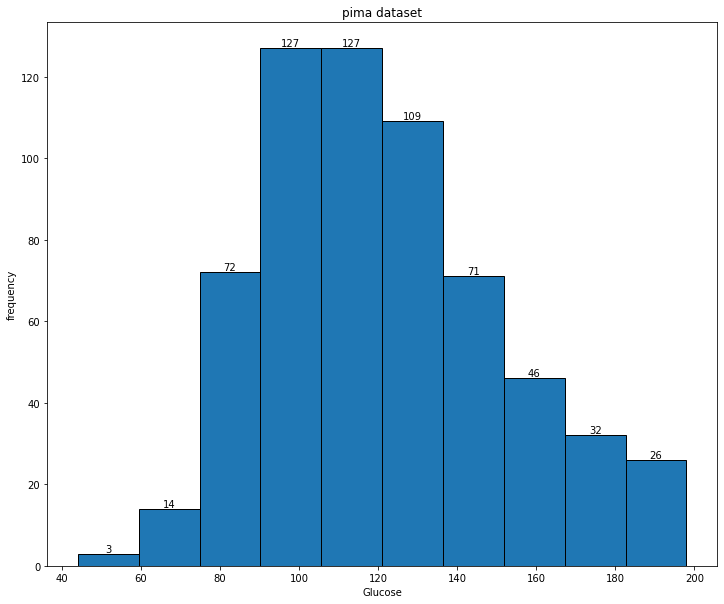

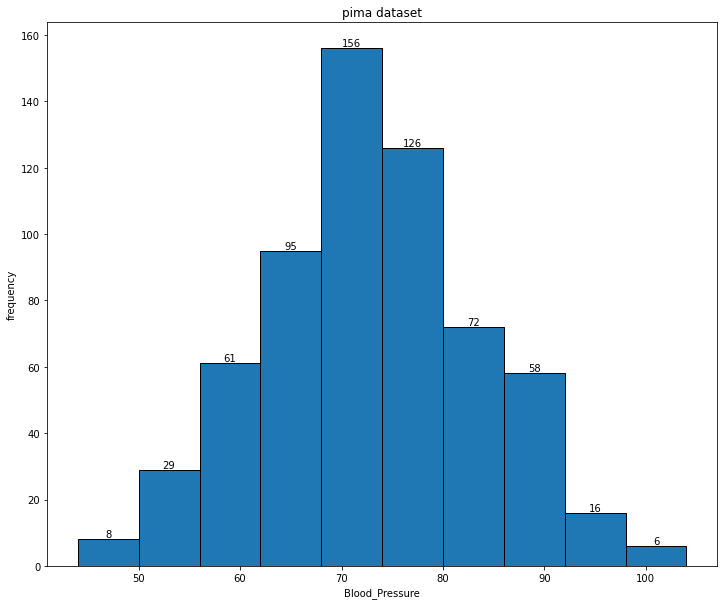

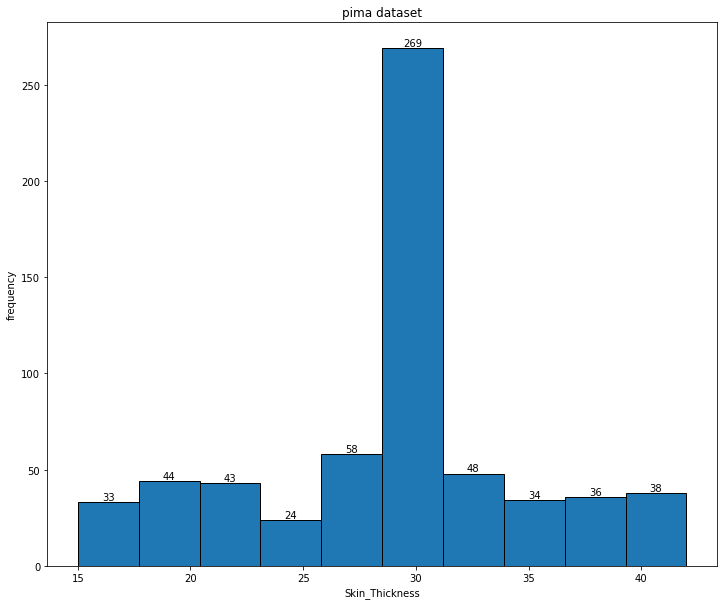

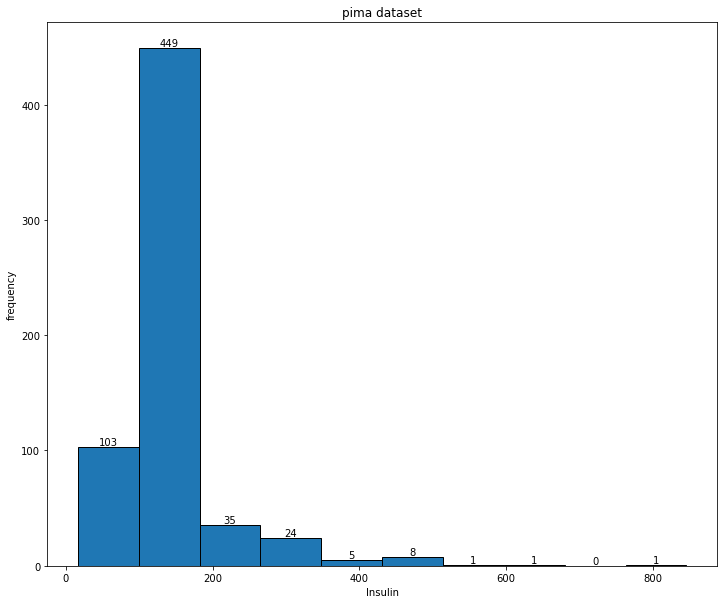

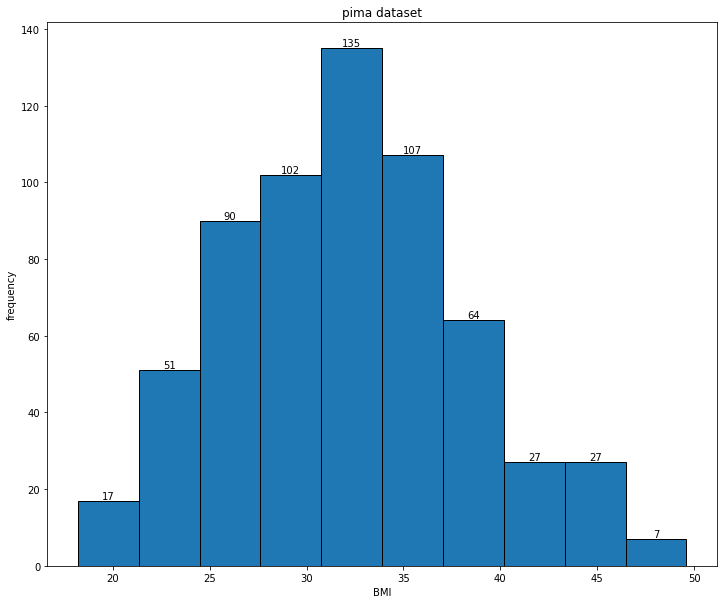

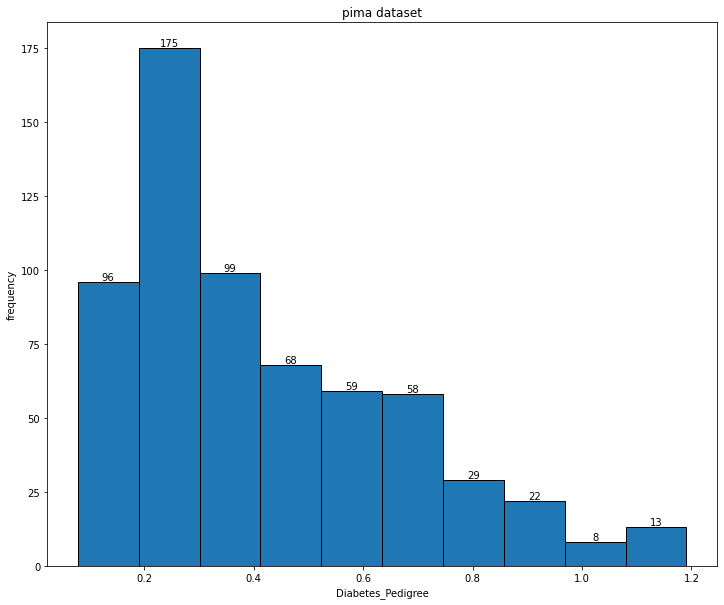

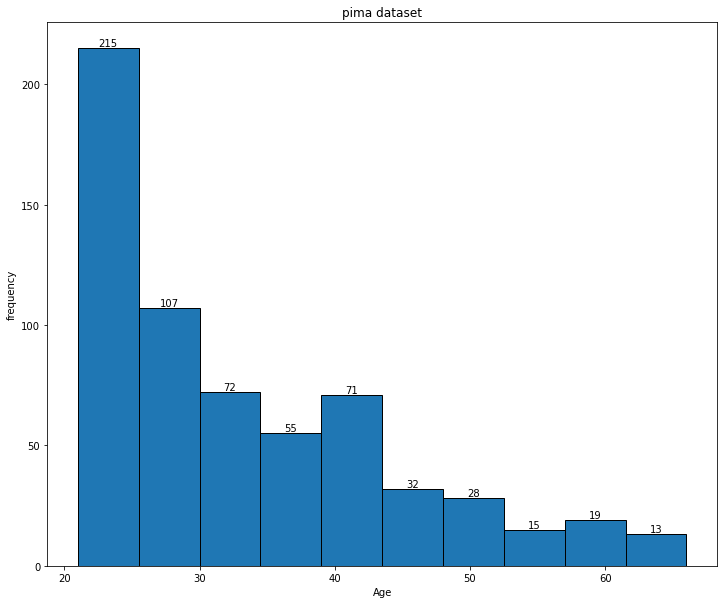

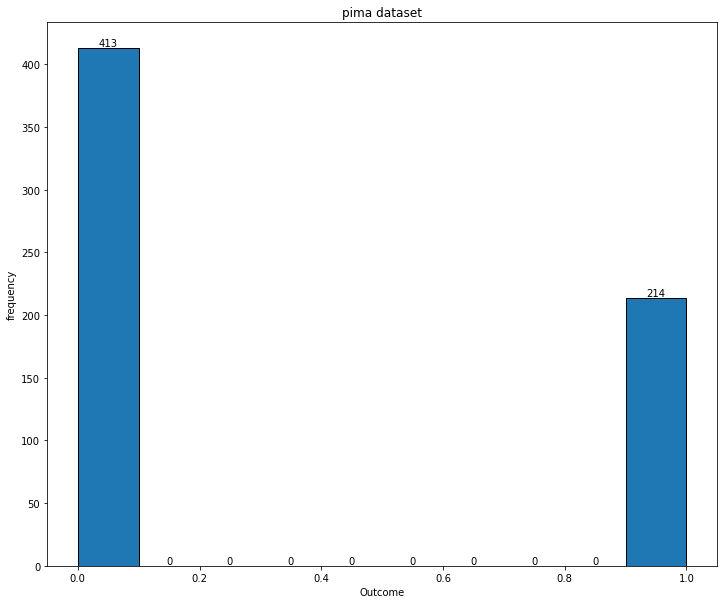

In [22]:
for i in df_clean.columns:
    plt.figure(figsize = (12, 10))
    plt.title('pima dataset')
    cnts,edges,bars=plt.hist(df_clean[i],edgecolor='black')
    plt.bar_label(bars)
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.show()

In [23]:
targ=df_clean.iloc[:,8]
dfclean=df_clean.drop(columns=['Outcome'])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dfclean, targ, test_size=0.3, random_state=0)

In [25]:
import statsmodels.api as sm
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        print(p_values)
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [26]:
backward_elimination(X_train,y_train,0.05)

Pregnancies          3.676989e-04
Glucose              1.071136e-16
Blood_Pressure       8.852020e-01
Skin_Thickness       6.270692e-01
Insulin              7.343696e-01
BMI                  5.588432e-04
Diabetes_Pedigree    1.385421e-02
Age                  2.988125e-01
dtype: float64
Pregnancies          3.657046e-04
Glucose              7.790182e-17
Skin_Thickness       6.320327e-01
Insulin              7.197180e-01
BMI                  4.504245e-04
Diabetes_Pedigree    1.349429e-02
Age                  2.983893e-01
dtype: float64
Pregnancies          3.708095e-04
Glucose              7.831209e-20
Skin_Thickness       6.069110e-01
BMI                  4.351232e-04
Diabetes_Pedigree    1.327403e-02
Age                  2.907089e-01
dtype: float64
Pregnancies          2.245740e-04
Glucose              5.452576e-20
BMI                  3.877483e-05
Diabetes_Pedigree    1.214105e-02
Age                  2.862626e-01
dtype: float64
Pregnancies          1.227994e-06
Glucose              1

['Pregnancies', 'Glucose', 'BMI', 'Diabetes_Pedigree']

In [27]:
dr=pd.DataFrame({'Pregnancies':dfclean['Pregnancies'],'Glucose':dfclean['Glucose'],'Diabetes_Pedigree':dfclean['Diabetes_Pedigree'],'BMI':dfclean['BMI'],'Outcome':df_clean['Outcome']})

In [28]:
dr

,Pregnancies,Glucose,Diabetes_Pedigree,BMI,Outcome
0,1.0,85.0,0.351,26.6,0.0
1,8.0,183.0,0.672,23.3,1.0
2,1.0,89.0,0.167,28.1,0.0
4,5.0,116.0,0.201,25.6,0.0
5,3.0,78.0,0.248,31.0,1.0
...,...,...,...,...,...
763,2.0,122.0,0.340,36.8,0.0
764,5.0,121.0,0.245,26.2,0.0
765,1.0,126.0,0.349,30.1,1.0
766,1.0,93.0,0.315,30.4,0.0


In [29]:
dr.head()

,Pregnancies,Glucose,Diabetes_Pedigree,BMI,Outcome
0,1.0,85.0,0.351,26.6,0.0
1,8.0,183.0,0.672,23.3,1.0
2,1.0,89.0,0.167,28.1,0.0
4,5.0,116.0,0.201,25.6,0.0
5,3.0,78.0,0.248,31.0,1.0


In [30]:

import umap.umap_ as umap

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    dr.iloc[:,0:4], dr['Outcome'], test_size=0.3, random_state=0,shuffle=True)

In [32]:
import warnings
warnings.filterwarnings('ignore', message='not allowed')
trans=umap.UMAP(n_components=4).fit(X_train)

#umap_df=pd.DataFrame(umapcomp,columns=['com1','com2','com3','com4'])

In [33]:
#umap_df

X_train, X_test, y_train, y_test = train_test_split(
    umap_df, dr['Outcome'], test_size=0.3, random_state=0,shuffle=True)

In [34]:
X_test

,Pregnancies,Glucose,Diabetes_Pedigree,BMI
632,1.0,128.0,0.115,27.5
681,0.0,95.0,0.366,44.6
127,1.0,117.0,0.403,34.5
279,0.0,146.0,0.334,37.9
393,4.0,158.0,0.803,32.9
...,...,...,...,...
698,4.0,118.0,0.904,44.5
766,1.0,93.0,0.315,30.4
220,2.0,158.0,0.805,31.6
489,2.0,83.0,0.629,36.8


In [35]:
len(y_test)

189

In [36]:
trans.embedding_

array([[-2.312001 ,  8.567317 ,  6.0545177,  6.8067913],
       [10.302743 ,  6.569707 ,  7.3717628,  5.428803 ],
       [ 3.0323985,  8.108006 ,  5.927339 ,  5.699339 ],
       ...,
       [-4.0932307,  6.401459 ,  4.0831676,  5.9288225],
       [ 4.0596027,  8.069043 ,  5.426469 ,  5.200351 ],
       [11.142515 ,  6.0460496,  7.6012826,  5.386963 ]], dtype=float32)

# svc

In [37]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(base_estimator =SVC(kernel='linear'))
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [5,10,20,30,40,50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 0.5,1,1.5,2],
    'algorithm' : ['SAMME']
}
k1=[2,3,4,5,6,7,8,9,10]
#for i in k1:
grid_search = GridSearchCV(ada, parameters, cv=5,n_jobs = -1,verbose = 1)
grid_search.fit(trans.embedding_, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
{'algorithm': 'SAMME', 'learning_rate': 2, 'n_estimators': 5}
0.7306426332288403


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator =SVC(kernel='linear',C=1), algorithm = 'SAMME', learning_rate =2, n_estimators =5)
ada.fit(trans.embedding_, y_train)
#umapcomp=umap.UMAP(n_components=2).fit_transform(X_test)
#umap_df1=pd.DataFrame(umapcomp,columns=['com1','com2'])
y_predsvc=ada.predict(trans.transform(X_test))
y_train_predsvc=ada.predict(trans.embedding_)
ada_train_acc = accuracy_score(y_train, y_train_predsvc)
ada_test_acc = accuracy_score(y_test, y_predsvc)
print(ada_train_acc)
print(ada_test_acc)
k=confusion_matrix(y_test,y_predsvc)
k

0.726027397260274
0.8306878306878307


array([[125,   8],
       [ 24,  32]], dtype=int64)

# random forest

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
grid=dict()
grid['n_estimators']=[3,5,10,15,20,25,30,40,45,50,55,60,100,200]
grid['learning_rate']=[0.0001,0.0005,0.001,0.01,0.05,0.01,0.25,0.5,0.8,1,1.3,1.7,2]
abc=AdaBoostClassifier(base_estimator=RandomForestClassifier())
cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=1,random_state=0)
grid_search=GridSearchCV(estimator=abc,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy')
grid_result=grid_search.fit(trans.embedding_,y_train)
print("Best:%f using %s"%(grid_result.best_score_,grid_result.best_params_))

#abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,
                         #learning_rate=0.01)
# Train Adaboost Classifer
#umap_df1=umap_df.drop(columns=['label'])
#model = abc.fit(umap_df1,y_train)


Best:0.703190 using {'learning_rate': 0.0005, 'n_estimators': 45}


In [71]:
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier(),n_estimators=45,
                         learning_rate=0.0005)
model = abc.fit(trans.embedding_,y_train)

In [72]:
y_predrd = abc.predict(trans.transform(X_test))
y_train_predrd=abc.predict(trans.embedding_)
print(accuracy_score(y_test, y_predrd))
print(accuracy_score(y_train, y_train_predrd))

0.7619047619047619
1.0


# Decision Tree

In [43]:
grid=dict()
grid['n_estimators']=[3,5,10,15,20,25,30,40,45,50,55,60,100,200]
grid['learning_rate']=[0.0001,0.0005,0.001,0.01,0.05,0.01,0.25,0.5,0.8,1,1.3,1.7,2]
abc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=1,random_state=0)
grid_search=GridSearchCV(estimator=abc,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy')
grid_result=grid_search.fit(trans.embedding_,y_train)
print("Best:%f using %s"%(grid_result.best_score_,grid_result.best_params_))


Best:0.650626 using {'learning_rate': 1.3, 'n_estimators': 60}


In [77]:
abc2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=60,
                         learning_rate=1.3)
model2 = abc2.fit(trans.embedding_,y_train)

In [78]:
y_predrd2 = abc2.predict(trans.transform(X_test))
y_train_predrd2=abc2.predict(trans.embedding_)
print(accuracy_score(y_test, y_predrd2))
print(accuracy_score(y_train, y_train_predrd2))

0.6825396825396826
1.0


# Extratrees

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
grid=dict()
grid['n_estimators']=[3,5,10,15,20,25,30,40,45,50,55,60,100,200]
grid['learning_rate']=[0.0001,0.0005,0.001,0.01,0.05,0.01,0.25,0.5,0.8,1,1.3,1.7,2]
abc=AdaBoostClassifier(base_estimator=ExtraTreesClassifier())
cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=1,random_state=0)
grid_search=GridSearchCV(estimator=abc,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy')
grid_result=grid_search.fit(trans.embedding_,y_train)
print("Best:%f using %s"%(grid_result.best_score_,grid_result.best_params_))


Best:0.684946 using {'learning_rate': 0.0001, 'n_estimators': 55}


In [85]:
abc3 = AdaBoostClassifier(base_estimator=ExtraTreesClassifier(),n_estimators=55,
                         learning_rate=0.0001)
model3 = abc3.fit(trans.embedding_,y_train)

In [86]:
y_predrd3 = abc3.predict(trans.transform(X_test))
y_train_predrd3=abc3.predict(trans.embedding_)
print(accuracy_score(y_test, y_predrd3))
print(accuracy_score(y_train, y_train_predrd3))

0.7037037037037037
1.0


# Naive baise

from sklearn.naive_bayes import GaussianNB
grid=dict()
grid['n_estimators']=[3,5,10,15,20,25,30,40,45,50,55,60,100,200]
grid['learning_rate']=[0.0001,0.0005,0.001,0.01,0.05,0.01,0.25,0.5,0.8,1,1.3,1.7,2]
abc=AdaBoostClassifier(base_estimator=GaussianNB())
cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=1,random_state=0)
grid_search=GridSearchCV(estimator=abc,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy')
grid_result=grid_search.fit(trans.embedding_,y_train)
print("Best:%f using %s"%(grid_result.best_score_,grid_result.best_params_))


abc4= AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=50,
                         learning_rate=0.05)
model = abc4.fit(trans.embedding_,y_train)

y_predrd4 = abc4.predict(trans.transform(X_test))
y_train_predrd4=abc4.predict(trans.embedding_)
print(accuracy_score(y_test, y_predrd4))
print(accuracy_score(y_train, y_train_predrd4))

# SGD CLASSIFIER

from sklearn.linear_model import SGDClassifier
grid=dict()
grid['n_estimators']=[3,5,10,15,20,25,30,40,45,50,55,60,100,200]
grid['learning_rate']=[0.0001,0.0005,0.001,0.01,0.05,0.01,0.25,0.5,0.8,1,1.3,1.7,2]
abc=AdaBoostClassifier(base_estimator=SGDClassifier(),algorithm='SAMME')
cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=1,random_state=0)
grid_search=GridSearchCV(estimator=abc,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy')
grid_result=grid_search.fit(trans.embedding_,y_train)
print("Best:%f using %s"%(grid_result.best_score_,grid_result.best_params_))


abc5 = AdaBoostClassifier(base_estimator=SGDClassifier(),n_estimators=100,
                         learning_rate=0.8,algorithm='SAMME')
model5 = abc5.fit(trans.embedding_,y_train)

y_predrd5 = abc5.predict(trans.transform(X_test))
y_train_predrd5=abc5.predict(trans.embedding_)
print(accuracy_score(y_test, y_predrd))
print(accuracy_score(y_train, y_train_predrd))

# Stacking

In [93]:
from mlxtend.classifier import StackingClassifier
ada1 = AdaBoostClassifier(base_estimator=SVC(kernel='linear'),n_estimators=5
                          ,learning_rate=2,algorithm='SAMME')  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[abc,ada], meta_classifier = ada1, use_probas = False, use_features_in_secondary = True)

In [100]:

model_stack = clf_stack.fit(trans.embedding_,y_train)   # training of stacked model
pred_stack = model_stack.predict(trans.transform(X_test)) 
predtrain_stack = model_stack.predict(trans.embedding_)
pred_stack





array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1.])

In [101]:
print(accuracy_score(y_test, pred_stack))
print(accuracy_score(y_train, predtrain_stack))
k1=confusion_matrix(y_test,pred_stack)
k1

0.8465608465608465
0.7557077625570776


array([[127,   6],
       [ 23,  33]], dtype=int64)

In [105]:
from sklearn.metrics import classification_report
report=classification_report(y_test, pred_stack)
print(report)

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       133
         1.0       0.85      0.59      0.69        56

    accuracy                           0.85       189
   macro avg       0.85      0.77      0.80       189
weighted avg       0.85      0.85      0.84       189



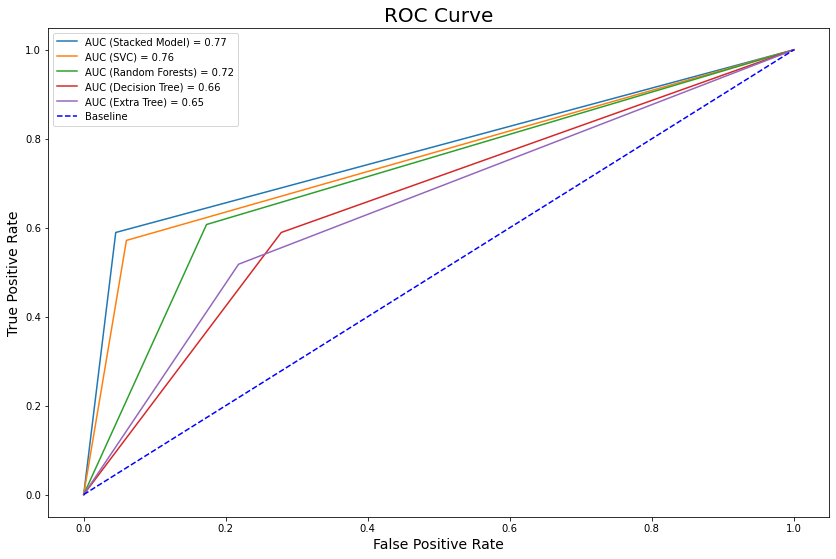

In [202]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_stack = roc_auc_score(y_test, pred_stack)
fpr_stack, tpr_stack, thresholds_stack= roc_curve(y_test, pred_stack)

auc_svc = roc_auc_score(y_test, y_predsvc)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_predsvc)

auc_rf = roc_auc_score(y_test, y_predrd)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_predrd)

auc_dt = roc_auc_score(y_test, y_predrd2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_predrd2)

auc_et= roc_auc_score(y_test, y_predrd3)
fpr_et, tpr_et, thresholds_et = roc_curve(y_test, y_predrd3)

plt.figure(figsize=(14, 9))
plt.plot(fpr_stack, tpr_stack, label=f'AUC (Stacked Model) = {auc_stack:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'AUC (SVC) = {auc_svc:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_et, tpr_et, label=f'AUC (Extra Tree) = {auc_et:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)

# following code does not work
plt.legend()
plt.savefig("roccurvesdiabetes9.png",bbox_inches='tight') 


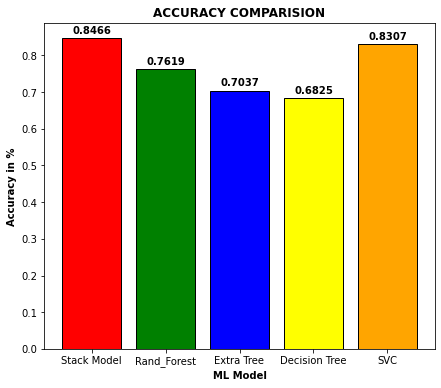

In [195]:
x9=['Stack Model','Rand_Forest','Extra Tree','Decision Tree','SVC']
y11=accuracy_score(y_test, pred_stack)
y12=accuracy_score(y_test, y_predrd)
y13=accuracy_score(y_test, y_predrd3)
y14=accuracy_score(y_test, y_predrd2)
y15=accuracy_score(y_test, y_predsvc)
y9=[y11,y12,y13,y14,y15]


import matplotlib.pyplot as plt

colors = ["red", "green", "blue","yellow","orange"]

# create bar graph
fig, ax = plt.subplots(figsize=(7,6))
rects=ax.bar(x9, y9, color=colors,edgecolor='black')

# set y value on each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", ha='center', va='bottom',fontweight='bold')
# set axis labels and title  

plt.xlabel("ML Model",fontweight='bold')
plt.ylabel("Accuracy in %",fontweight='bold')
plt.title("ACCURACY COMPARISION",fontweight='bold')

# display the y value on top of each bar
plt.savefig("baraccuracycomparision.png") 
# display the graph
plt.show()

In [146]:
targ

0      0.0
1      1.0
2      0.0
4      0.0
5      1.0
      ... 
763    0.0
764    0.0
765    1.0
766    0.0
769    1.0
Name: Outcome, Length: 627, dtype: float64

In [106]:
import numpy as np
def prediction(k):
    k=np.array(k).reshape(1,-1)
    k=pd.DataFrame(k,columns=['Pregnancies','Glucose','Diabetes_Pedigree','BMI'])
    print(k)
    z=ada.predict(trans.transform(k))
    print(z)
    if z[0]==1.0:
        return 'Diabetic'
    else:
        return 'Healthy'

In [107]:
prediction([1,85,0.393,32.9])

   Pregnancies  Glucose  Diabetes_Pedigree   BMI
0          1.0     85.0              0.393  32.9
[0.]


'Healthy'

In [108]:
import pickle

In [109]:
pickle.dump(model_stack,open('clf77.pkl','wb'))

In [110]:
import umap.umap_ as umap
import pickle
umapcom5=umap.UMAP(n_components=4)
pickle.dump(trans,open('umap77.pkl','wb'))